In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('LaptopPrice_data.xlsx')
df.head()

,Sr,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [3]:
df.shape

(1302, 13)

In [4]:
df.isnull().sum()

Sr             0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [5]:
df.columns

Index(['Sr', 'Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['Sr'], axis = 1, inplace=True)

In [8]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   Weight       1302 non-null   float64
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   Cpu brand    1302 non-null   object 
 8   HDD          1302 non-null   int64  
 9   SSD          1302 non-null   int64  
 10  Gpu brand    1302 non-null   object 
 11  os           1302 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.2+ KB


In [10]:
df.describe()

,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,8.385561,2.039416,59889.058673,0.146697,0.27957,414.101382,183.874040
std,5.085166,0.665274,37251.183866,0.353940,0.44896,515.889348,186.969314
min,2.000000,0.690000,9270.720000,0.000000,0.00000,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.00000,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.00000,0.000000,256.000000
75%,8.000000,2.300000,79303.816800,0.000000,1.00000,1000.000000,256.000000
max,64.000000,4.700000,324954.720000,1.000000,1.00000,2000.000000,1024.000000


In [11]:
cat = df.dtypes[df.dtypes == 'object'] #Categorical Columns
num = df.dtypes[df.dtypes != 'object'] #numecrical Columns 
print(cat)
print('--'*15)
print(num)

Company      object
TypeName     object
Cpu brand    object
Gpu brand    object
os           object
dtype: object
------------------------------
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
HDD              int64
SSD              int64
dtype: object


In [12]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

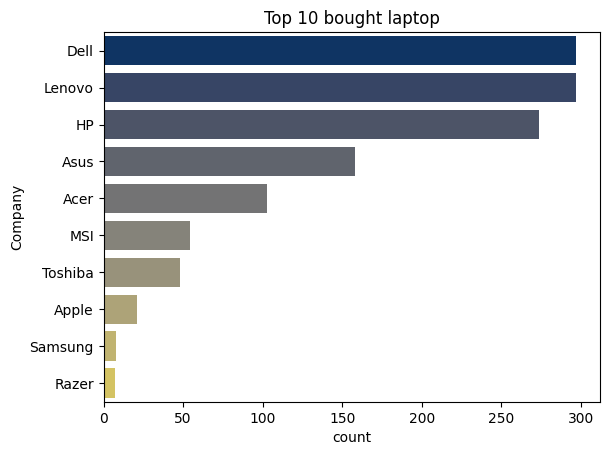

In [13]:
sns.countplot(y = df['Company'], 
              order = df['Company'].value_counts()[:10].sort_values(ascending = False).index,
             palette='cividis')
plt.title('Top 10 bought laptop')
plt.show()

In [14]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

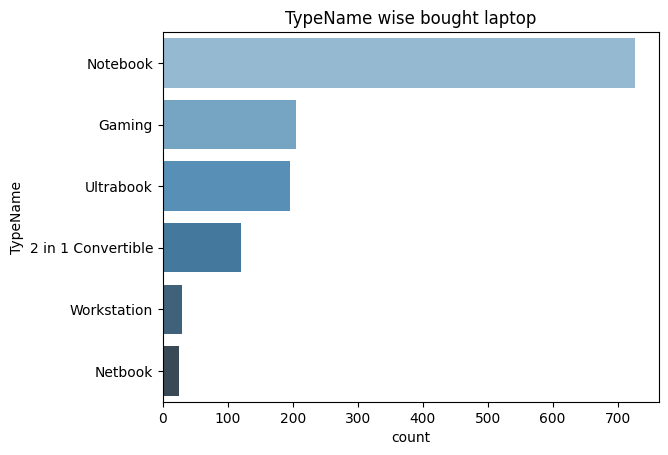

In [15]:
sns.countplot(y = df['TypeName'], 
              order = df['TypeName'].value_counts().sort_values(ascending = False).index,
             palette='Blues_d')
plt.title('TypeName wise bought laptop')
plt.show()

In [16]:
df['Ram'].value_counts()

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

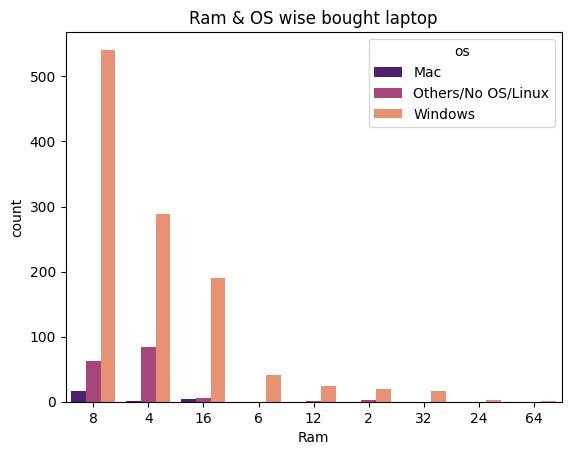

In [17]:
sns.countplot(x = df['Ram'], 
              order = df['Ram'].value_counts().sort_values(ascending = False).index,
             hue = df['os'], palette = 'magma')
plt.title('Ram & OS wise bought laptop')
plt.show()

In [18]:
s1 = df['Touchscreen'].value_counts()
s1

0    1111
1     191
Name: Touchscreen, dtype: int64

In [19]:
s2 = df['Ips'].value_counts()
s2

0    938
1    364
Name: Ips, dtype: int64

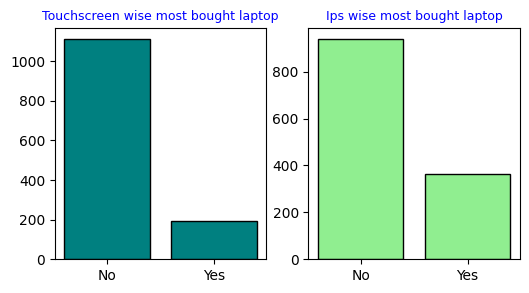

In [20]:
fig, (x1,x2) = plt.subplots(1,2, figsize = (6,3))
x1.bar(s1.index, s1.values, color = 'teal', edgecolor = 'black')
x1.set_title('Touchscreen wise most bought laptop', size = 9, color = 'blue')
x1.set_xticks([0,1],['No','Yes'])
x2.bar(s2.index, s2.values, color = 'lightgreen', edgecolor = 'black')
x2.set_title('Ips wise most bought laptop', size = 9, color = 'blue')
x2.set_xticks([0,1],['No','Yes'])
plt.show()

In [21]:
s3 = df['Cpu brand'].value_counts()
s3

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: Cpu brand, dtype: int64

In [22]:
s4 = df['SSD'].value_counts()
s4

256     498
0       459
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

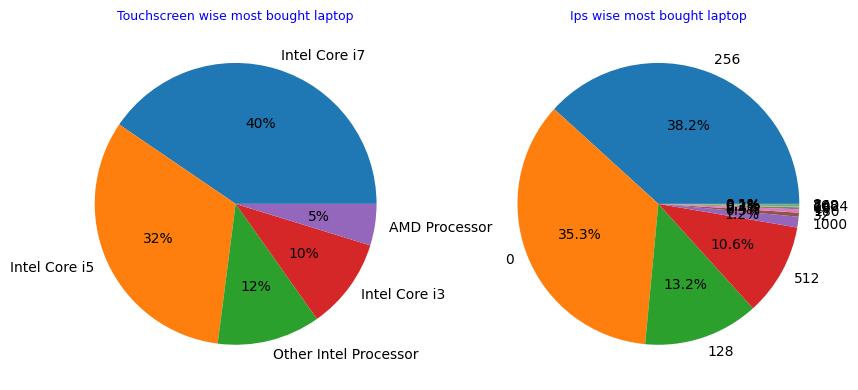

In [23]:
fig, (x3,x4) = plt.subplots(1,2, figsize = (10,10))
x3.pie(s3.values, labels = s3.index, autopct  ='%0.f%%')
x3.set_title('Touchscreen wise most bought laptop', size = 9, color = 'blue')
x4.pie(s4.values, labels = s4.index, autopct  ='%0.1f%%')
x4.set_title('Ips wise most bought laptop', size = 9, color = 'blue')
plt.show()

In [24]:
p1 = df['os'].value_counts()
p1

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

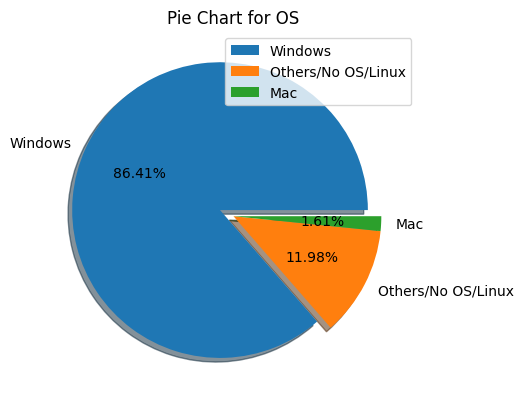

In [25]:
plt.pie(x = p1.values , labels = p1.index, autopct = '%0.2f%%' ,explode = (0.1,0,0),
       shadow=True )
plt.legend()
plt.title('Pie Chart for OS')
plt.show()

### Windows os is most bought laptop

In [26]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac


In [27]:
r1 = df.groupby(['Company','TypeName','Cpu brand','Ram'])[['Price']].mean().sort_values(by= 'Price', ascending  = False)[:10]
r1

Price
Company TypeName    Cpu brand             Ram             
Razer   Gaming      Intel Core i7         32   308970.7200
Lenovo  Notebook    Other Intel Processor 32   261018.7200
HP      Workstation Other Intel Processor 16   233845.9200
Asus    Gaming      Intel Core i7         64   211788.0000
Dell    Gaming      Intel Core i7         32   172427.0448
        Workstation Other Intel Processor 16   162770.4000
Razer   Gaming      Intel Core i7         16   159786.7200
Lenovo  Gaming      Intel Core i7         32   157255.9200
Toshiba Ultrabook   Intel Core i7         32   149130.7200
MSI     Gaming      Intel Core i7         32   149130.7200

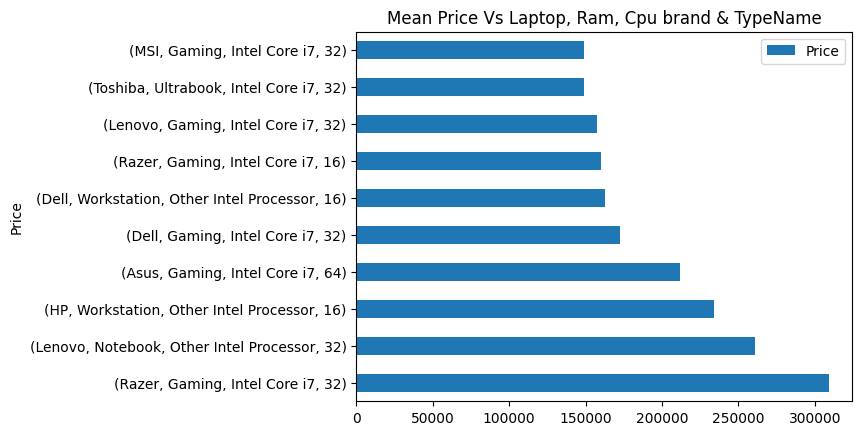

In [28]:
r1.plot(kind = 'barh')
plt.title('Mean Price Vs Laptop, Ram, Cpu brand & TypeName')
plt.ylabel('Price')
plt.show()

In [29]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac


In [30]:
r2 = df.groupby(['Company','os','Touchscreen'])[['Price']].apply(np.mean).sort_values(by = 'Price',
                                                                        ascending = False)[:14]
r2

Price
Company   os                 Touchscreen               
Razer     Windows            1            192154.320000
                             0            159786.720000
LG        Windows            0            122490.720000
                             1            106506.720000
Toshiba   Windows            1            105132.096000
MSI       Windows            0             92116.226133
Samsung   Windows            1             90522.720000
                             0             89457.120000
Google    Others/No OS/Linux 1             89386.080000
Microsoft Windows            1             85903.788000
HP        Windows            1             84983.432832
Apple     Mac                0             83340.499886
Lenovo    Windows            1             80086.703718
Huawei    Windows            0             75870.720000

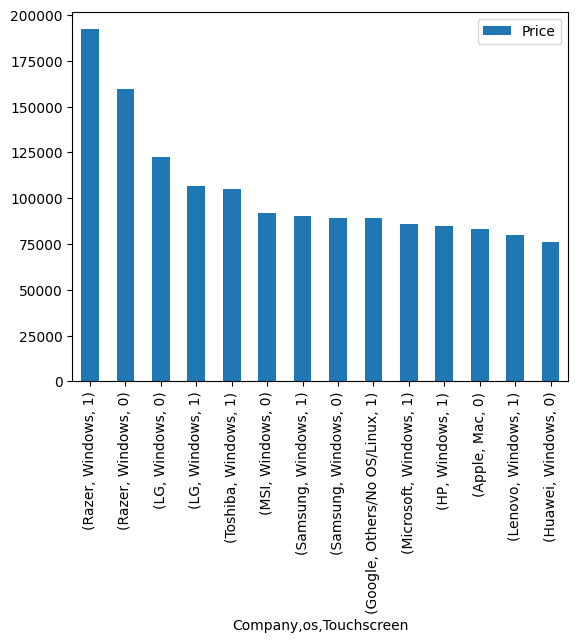

In [31]:
r2.plot(kind = 'bar')
plt.show()

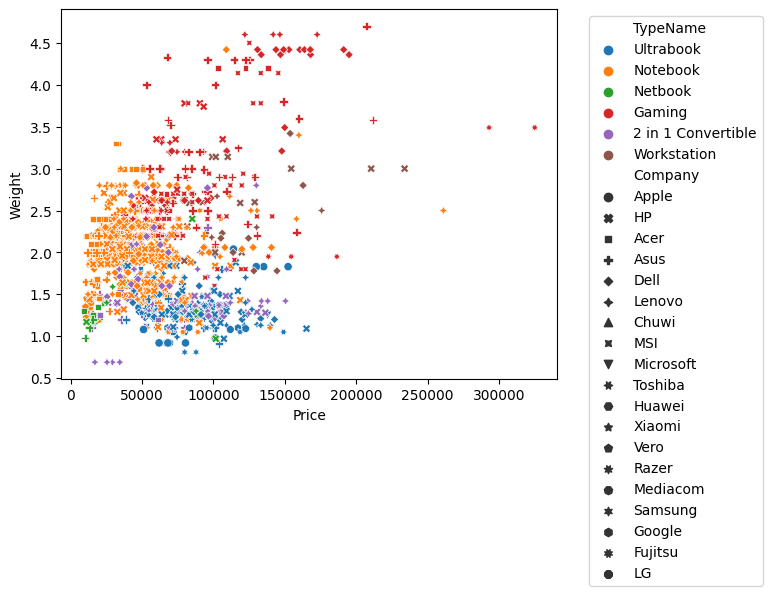

In [32]:
sns.scatterplot(x = df['Price'], y = df['Weight'], hue = df['TypeName'], style=df['Company'])
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [33]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac


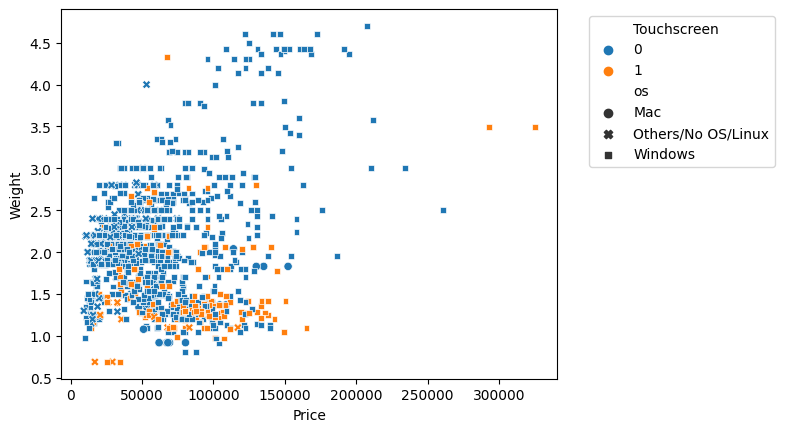

In [34]:
sns.scatterplot(x = df['Price'], y = df['Weight'], hue = df['Touchscreen'], style=df['os'])
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

<AxesSubplot: >

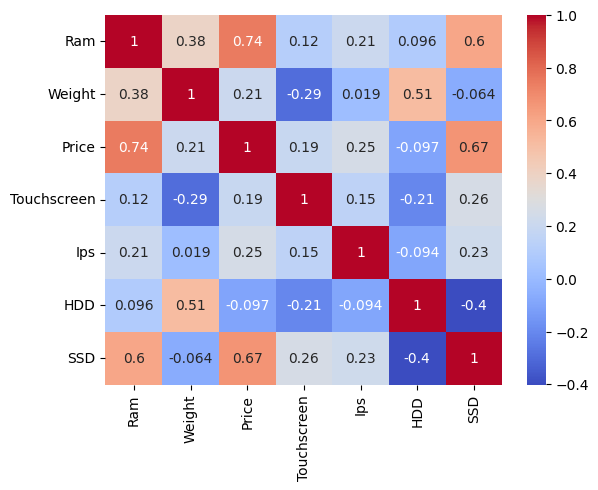

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

#### RAM and SSD are positively affecting the price. Both are high corr with Price

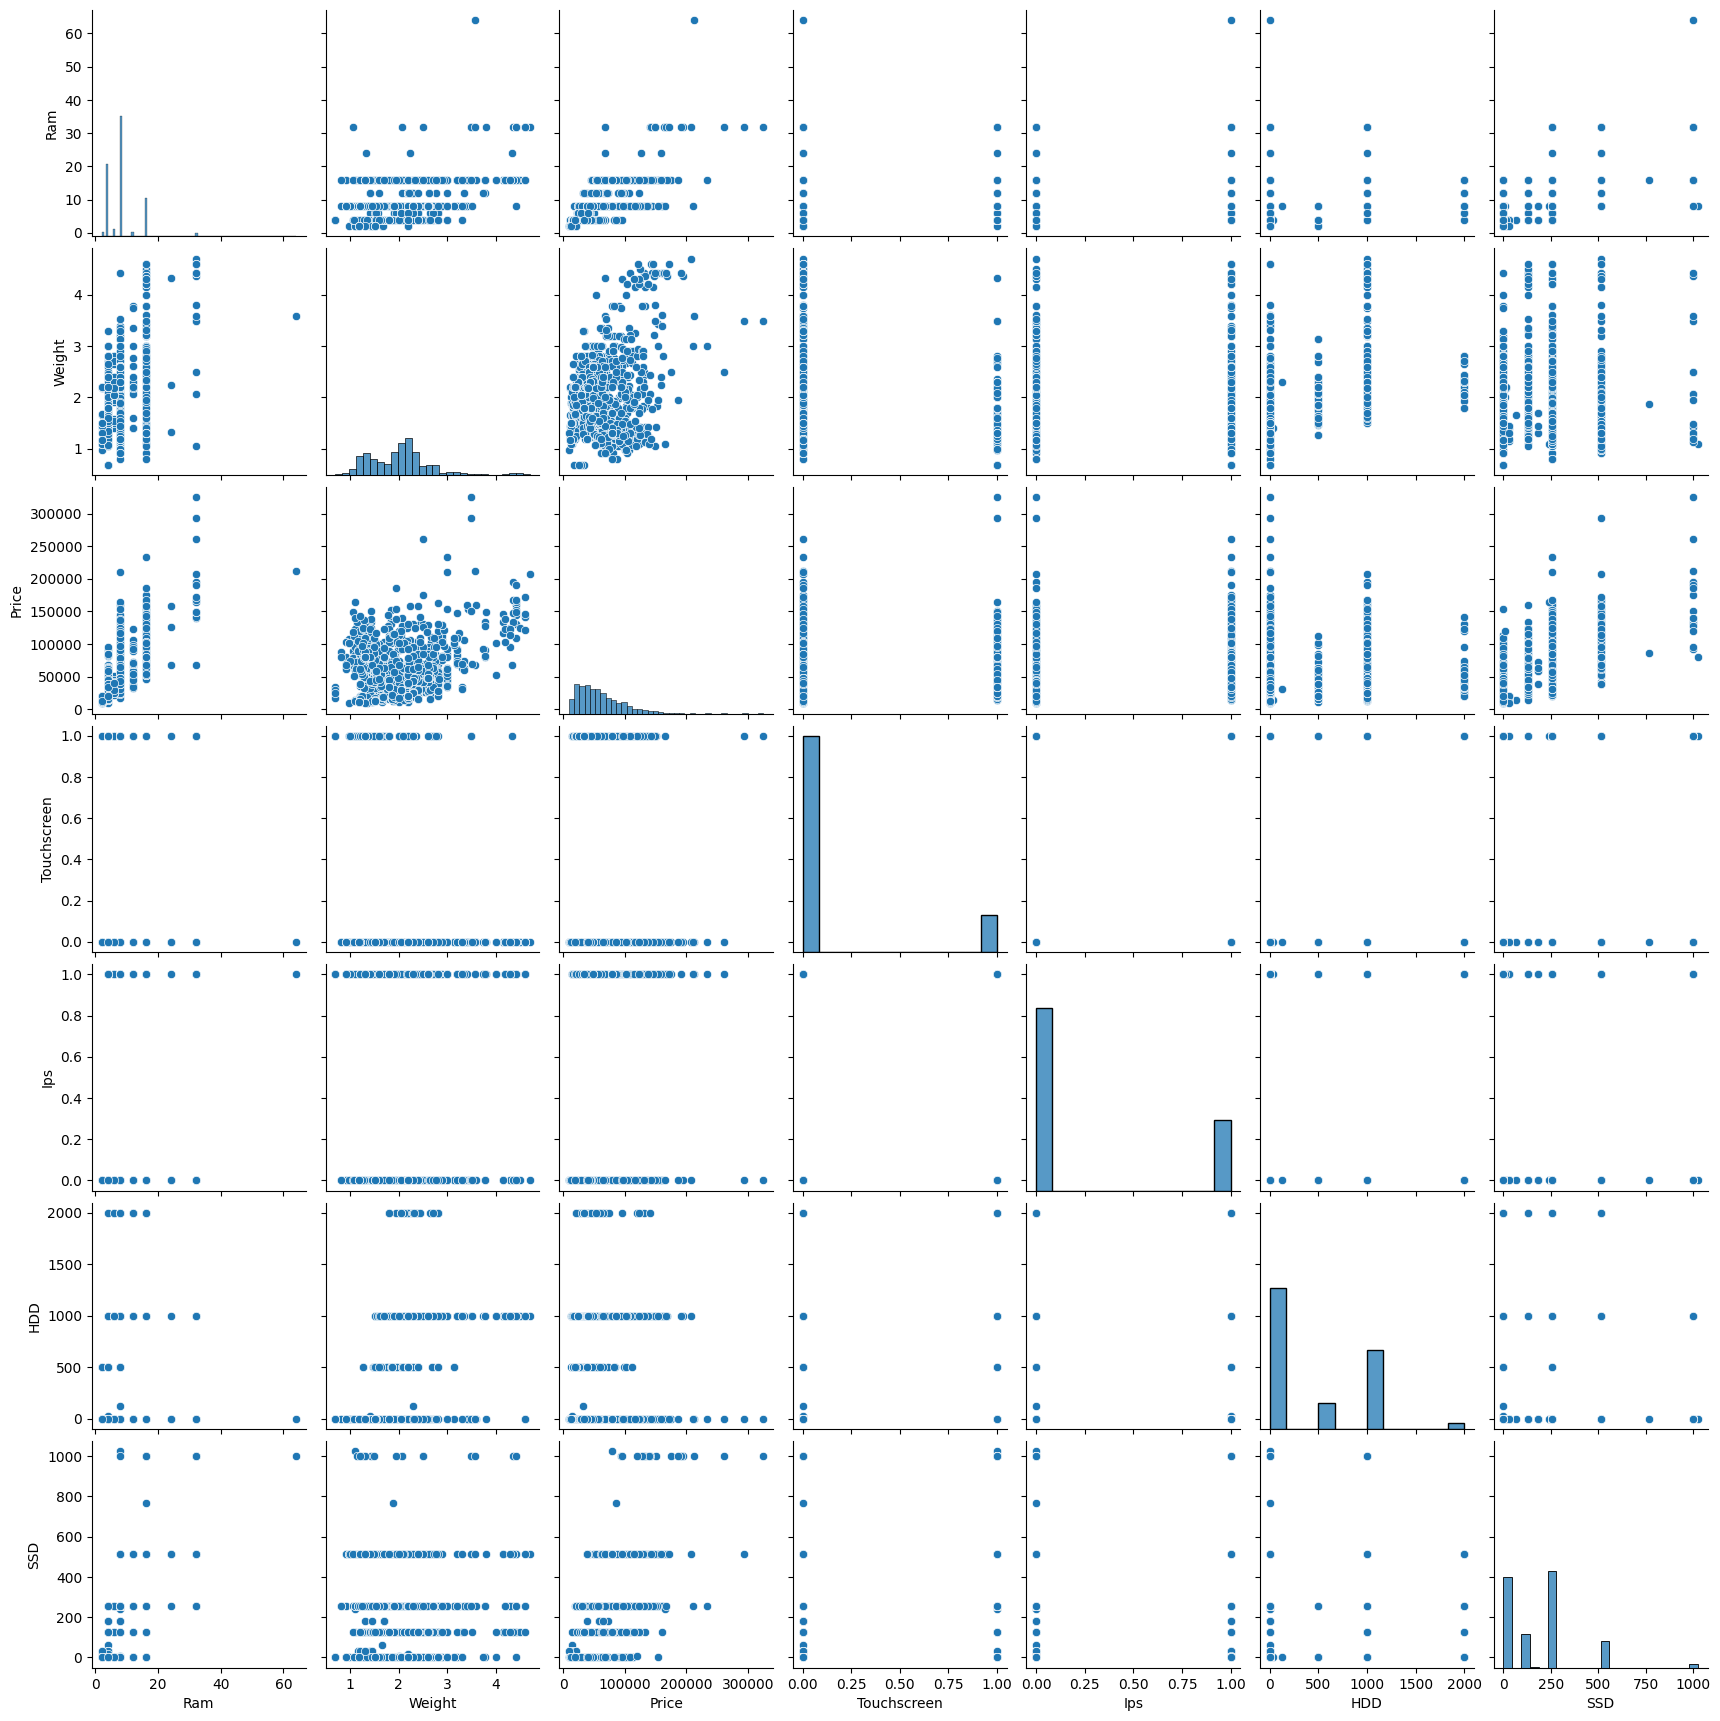

In [36]:
sns.pairplot(df)
plt.show()

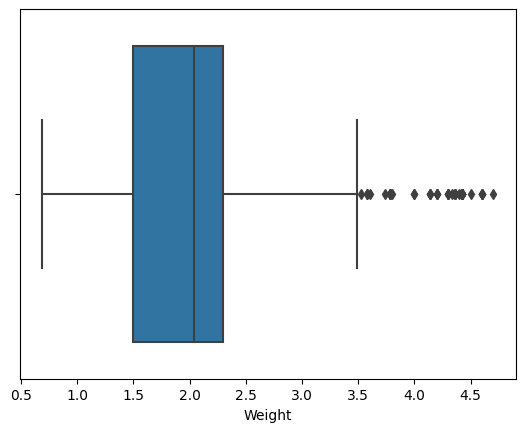

In [37]:
sns.boxplot(x = df['Weight'])
plt.show()

In [38]:
df[df['Weight']>3.4].shape

(50, 12)

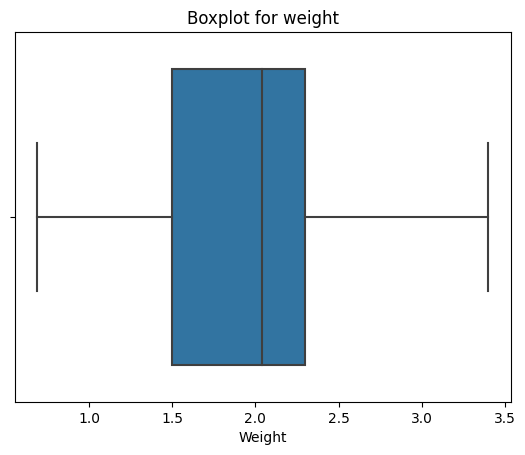

In [39]:
df['Weight'] = np.where(df['Weight']>3.4,3.4,df['Weight'])
sns.boxplot(x = df['Weight'])
plt.title('Boxplot for weight')
plt.show()

<AxesSubplot: xlabel='Price'>

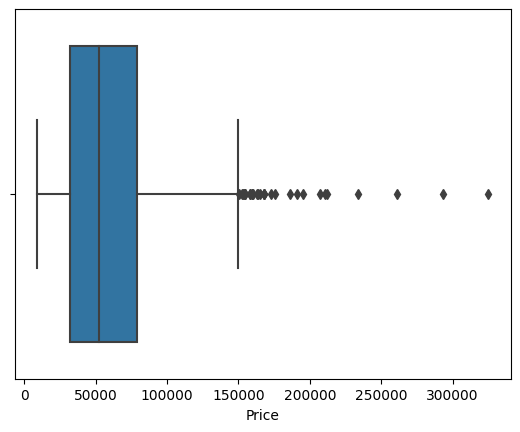

In [40]:
sns.boxplot(x = df['Price'])

In [41]:
df[df['Price']>150000].head(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
17,Apple,Ultrabook,16,1.83,152274.2400,0,1,Intel Core i7,0,512,AMD,Mac
190,Lenovo,2 in 1 Convertible,16,1.42,150462.7200,1,0,Intel Core i7,0,1000,Intel,Windows
196,Razer,Gaming,32,3.40,324954.7200,1,0,Intel Core i7,0,1000,Nvidia,Windows
204,Dell,Workstation,16,2.80,162770.4000,0,0,Other Intel Processor,1000,256,Nvidia,Windows
238,Asus,Gaming,32,3.40,207259.2000,0,0,Intel Core i7,1000,512,Nvidia,Windows
247,Asus,Gaming,16,3.40,159786.7200,0,0,Intel Core i7,0,256,Nvidia,Windows
297,Dell,Workstation,16,3.40,153705.3408,0,0,Intel Core i7,0,256,Nvidia,Windows
517,Asus,Gaming,24,2.24,158135.0400,0,0,Intel Core i7,0,512,Nvidia,Windows
530,Dell,Gaming,16,3.40,160520.3856,0,1,Intel Core i7,1000,128,Nvidia,Windows
563,Lenovo,Notebook,8,3.40,159786.7200,0,1,Intel Core i7,0,256,Nvidia,Windows


### As price is high due to high configuration of laptop

### Remaining int columns are categorical columns

#### Selecting the dependent ans independent feature

In [42]:
x = df.drop('Price', axis = 1)
y = df['Price']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1302, 11)
(1302,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=35)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(976, 11)
(326, 11)
(976,)
(326,)


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
def err_repo(ytest, ypred):
    print('MAE', mean_absolute_error(ytest, ypred))
    print('MSE', mean_squared_error(ytest, ypred))
    print('RMSE',np.sqrt(mean_squared_error(ytest, ypred)))
    print('R2 Score', r2_score(ytest, ypred))

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [48]:
print(df.columns)
print(cat)

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')
Company      object
TypeName     object
Cpu brand    object
Gpu brand    object
os           object
dtype: object


# 1) LinearRegression

In [49]:
step1 = ColumnTransformer(transformers=
                          [('encoder',OneHotEncoder(drop = 'first',sparse=False),[0,1,6,9,10])],
                 remainder = 'passthrough')
step2 = LinearRegression()
pipe_lr = Pipeline([('step1',step1),
                    ('step2',step2)])
pipe_lr.fit(x_train, y_train)
ypred = pipe_lr.predict(x_test)
err_repo(y_test, ypred)

MAE 13574.54523613861
MSE 363818188.4799108
RMSE 19074.018676721244
R2 Score 0.7577022462036314


# 2) LassoRegression

In [50]:
step1 = ColumnTransformer(transformers=
                          [('encoder',OneHotEncoder(drop = 'first',sparse=False),[0,1,6,9,10])],
                 remainder = 'passthrough')
step2 = Lasso(alpha=0.5)
pipe_la = Pipeline([('step1',step1),
                    ('step2',step2)])
pipe_la.fit(x_train, y_train)
ypred = pipe_la.predict(x_test)
err_repo(y_test, ypred)

MAE 13568.905858015172
MSE 363650982.30285746
RMSE 19069.63508572876
R2 Score 0.7578136031462024


# 3) RidgeRegression

In [51]:
step1 = ColumnTransformer(transformers=
                          [('encoder',OneHotEncoder(drop = 'first',sparse=False),[0,1,6,9,10])],
                 remainder = 'passthrough')
step2 = Ridge(alpha=15)
pipe_re = Pipeline([('step1',step1),
                    ('step2',step2)])
pipe_re.fit(x_train, y_train)
ypred = pipe_re.predict(x_test)
err_repo(y_test, ypred)

MAE 13473.251454950367
MSE 356103136.2963092
RMSE 18870.69517257669
R2 Score 0.7628403615417314


# 4) KNeigbhorRegression

In [52]:
step1 = ColumnTransformer(transformers=
                          [('encoder',OneHotEncoder(drop = 'first',sparse=False),[0,1,6,9,10])],
                 remainder = 'passthrough')
step2 = KNeighborsRegressor(n_neighbors=6)
pipe_kn = Pipeline([('step1',step1),
                    ('step2',step2)])
pipe_kn.fit(x_train, y_train)
ypred = pipe_kn.predict(x_test)
err_repo(y_test, ypred)

MAE 12959.338527607362
MSE 371353788.44193256
RMSE 19270.541986200922
R2 Score 0.7526836435000814


# 5) DecisionTreeRegressor

In [53]:
step1 = ColumnTransformer(transformers=
                          [('encoder',OneHotEncoder(drop = 'first',sparse=False),[0,1,6,9,10])],
                 remainder = 'passthrough')
step2 = DecisionTreeRegressor(max_depth = 10, min_samples_split=20)
pipe_dt = Pipeline([('step1',step1),
                    ('step2',step2)])
pipe_dt.fit(x_train, y_train)
ypred = pipe_dt.predict(x_test)
err_repo(y_test, ypred)

MAE 12292.683395008207
MSE 332453323.68936497
RMSE 18233.302599621522
R2 Score 0.778590801332303


# 6) RandomForestRegressor

In [54]:
step1 = ColumnTransformer(transformers=
                          [('encoder',OneHotEncoder(drop = 'first',sparse=False),[0,1,6,9,10])],
                 remainder = 'passthrough')
step2 = RandomForestRegressor(n_estimators=120, max_depth = 12, min_samples_split=25, )
pipe_rf = Pipeline([('step1',step1),
                    ('step2',step2)])
pipe_rf.fit(x_train, y_train)
ypred = pipe_rf.predict(x_test)
err_repo(y_test, ypred)

MAE 11903.278755001806
MSE 309826163.0875366
RMSE 17601.87953280946
R2 Score 0.7936601693908915


### RandomForestRegressor is the best model in term of r2 score and RMSE

# Save the model

In [55]:
import pickle

In [56]:
pickle.dump(pipe_rf,open('rf.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))